# Data load test code

## 기본 라이브러리 

In [303]:
import h5py
import argparse
import os
import pickle
import json
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

## Custom module

In [310]:
from dataloader import bert_clustering, data_partition, load_datasets

ImportError: cannot import name 'bert_clustering' from 'dataloader' (/home/ckjwh/ckj/FedML/prompt4FED/dataloader.py)

In [3]:
# Setting
data_file = "/home/ckjwh/ckj/FedML/python/app/fednlp/fednlp_data/data_files/cornell_movie_dialogue_data.h5"
N_Clients = 5
batch = 32
embedding_file = "/home/ckjwh/ckj/FedML/python/app/fednlp/fednlp_data/embedding_files/cornell_movie_dialogue_embedding.pkl"
task_type = "seq2seq"
overwrite = False

data_dir = '/home/ckjwh/ckj/FedML/python/app/fednlp/data/advanced_partition/Clients'

In [44]:
df = load_datasets(N_Clients, data_file, task_type, embedding_file, overwrite, batch)

start reading data
start process embedding data and kmeans partition


Batches: 100%|██████████| 3463/3463 [01:32<00:00, 37.51it/s]


start Kmeans


/home/ckjwh/anaconda3/envs/FedML/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


end Kmeans


In [46]:
df

,input,label,assigned
0,"Well, I thought we'd start with pronunciation,...",Not the hacking and gagging and spitting part....,1
1,Right. See? You're ready for the quiz.,I just wanted --,3
2,Why should I carry your bag? I am not a dog.,Wording and your friendship with the Colonel a...,0
3,Let me try.,You? Why I'm sure it would pale in comparison ...,0
4,Let me try!,That... was... no... simulation.,4
...,...,...,...
110803,"I'm through with puppets, Lotte. I just want y...",I know.,1
110804,I'd like to be a farmer. I want to help things...,Sure. We could really use a farmer. We'd be gr...,0
110805,I can't believe it. This is too good to be true.,"Holy shit, yes!",2
110806,Holy shit! He said what I said!,Holy shit! He said what I said!,2


In [298]:
# 클라이언트 수 설정
num_clients = 5

# alpha 값 설정 (0부터 1 사이)
alpha = 1

# 데이터 디렉토리 설정
data_dir = "data_dir"

# 함수 호출
make_dir(num_clients, data_dir, df, alpha)

Data splitting and saving complete.


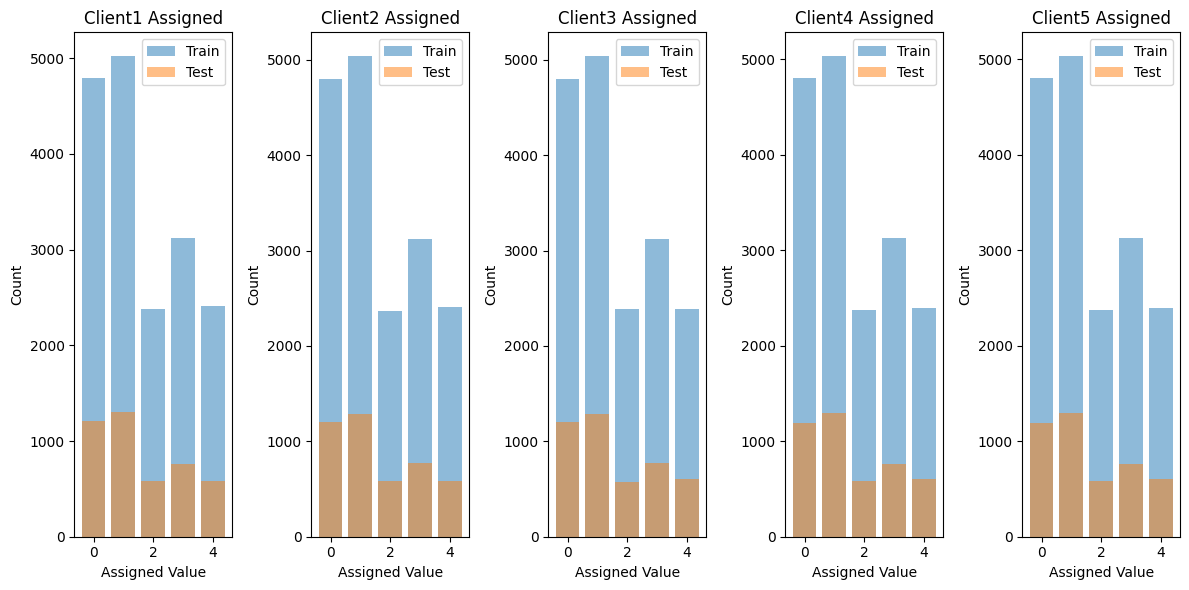

In [301]:
visualize_distribution(data_dir)